# Curso: "NumPy: análise numérica eficiente com Python" - Alura

In [2]:
import numpy as np
import matplotlib.pyplot as plt

O link abaixo é um raw do dataset no github. Usando dessa forma é possível importar os dados sem precisar fazer o upload no colab.

In [ ]:
url = 'https://raw.githubusercontent.com/ogustavoalves/curso_numpy/refs/heads/main/docs/apples_ts.csv?token=GHSAT0AAAAAACZQWZ6HR6AMCV6TD4OFXNA4Z5M7AFA'

Usa-se o método loadtxt do Numpy para ler o conteúdo do link que está organizado num txt onde o delimitador é uma vírgula (`delimiter = ','`).<br>
O parâmetro `usercols` é usado para indicar quais colunas do dataset serão lidas e nesse caso isso é feito definindo um range de números com `np.arange(1, 88,1)` onde:
- começa-se do 1 pois a coluna zero são os nomes das cidades, por serem strings, precisa-se pular tais
- a última coluna tem o número 87 e como precisa-se ir um elemento a mais em ranges no python, se vai até o 88.
- o último elemento do arange indica o passo que, nesse caso, é 1.


In [ ]:
dados = np.loadtxt(url, delimiter=',', usecols=np.arange(1, 88, 1))

In [31]:
dados = np.loadtxt(fname='./docs/apples_ts.csv', delimiter=',', usecols=np.arange(1, 88, 1))

In [ ]:
np.arange(1, 88, 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87])

# Dimensão do dado

Métodos para conseguir informações sobre o dataset.

### Dimensões

In [ ]:
dados.ndim

2

#

### Tamanho
linhas x colunas

In [ ]:
dados.size

522

# Informações de linhas e colunas

In [ ]:
dados.shape

(6, 87)

## Transpondo o Dataset

A operação de transposição trata de inverter as posições das linhas e colunas de modo que, um array de 6 linhas e 87 colunas como o atual, passe a ser um de 6 colunas e 87 linhas.<br>
Isso pode ser observado ao fazer o shape do dataset antes e depois da transposição. (O método shape retorna uma tupla com o número de linhas e depois o de colunas.)

In [32]:
dados_transpostos = dados.T
dados_transpostos.shape

(87, 6)

# Visualizando informações

## Intro

A visualização de informações é feita gerando um gráfico com eixo x e y dos dados.

Pegando a primeira coluna do dataset, referente as datas (coluna 0).

In [37]:
datas1 = dados_transpostos[:,0]

#### Eixo Y

Pegando os preços, referentes às colunas 1 até 5 do dataset.

In [36]:
precos = dados_transpostos[:,1:6]

### Pyplot

Trata-se da lib necessária para gerar os gráficos.<br>
O método usado é `plt.plot(eixo_x, eixo_y)`.

In [ ]:
import matplotlib.pyplot as plt

#### Eixo X
Para as datas no eixo x é necessário usar um arrange que vai de 1 até 87.

In [34]:
datas2 = np.arange(1,88)

### Plotando os dados com legenda

Gráfico feito sem separa os preços em vetores de cada cidade.

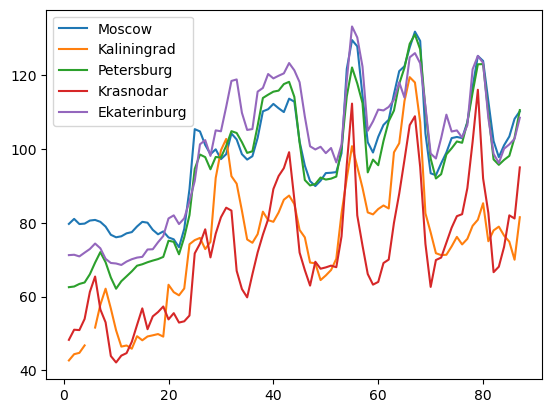

In [38]:
plt.plot(datas2, precos)
plt.legend(['Moscow', 'Kaliningrad', 'Petersburg', 'Krasnodar', 'Ekaterinburg']);

## Repartindo os dados por cidade

Cada coluna da número 1 até a 4 representa uma cidade, então ao filtrar e pegar todas as linhas, se têm a variação de preço no período.

In [44]:
Moscow = precos[:,0]
Kaliningrad = precos[:,1]
Petersburg = precos[:,2]
Krasnodar = precos[:,3]
Ekaterinburg = precos[:,4]

Observando conteúdo do array "Krasnodar".

In [45]:
Krasnodar

array([ 48.26,  51.01,  50.91,  53.94,  61.27,  65.44,  56.51,  53.  ,
        43.87,  42.12,  43.98,  44.66,  47.73,  52.31,  56.8 ,  51.15,
        54.63,  55.8 ,  57.31,  53.81,  55.5 ,  52.95,  53.29,  54.86,
        71.72,  74.36,  78.25,  70.63,  77.06,  81.52,  84.12,  83.33,
        66.98,  62.04,  59.79,  66.06,  71.99,  76.79,  80.98,  89.18,
        92.71,  94.85,  99.18,  86.33,  71.94,  67.18,  62.98,  69.45,
        67.56,  67.92,  68.4 ,  67.97,  76.33,  95.79, 112.36,  82.03,
        73.83,  66.12,  63.24,  63.98,  69.1 ,  70.04,  80.03,  87.92,
        97.07, 106.52, 108.93,  95.17,  74.31,  62.63,  69.92,  70.58,
        74.63,  78.69,  81.82,  82.36,  89.44, 102.01, 116.12,  92.06,
        82.7 ,  66.62,  68.11,  73.48,  82.04,  81.19,  95.05])

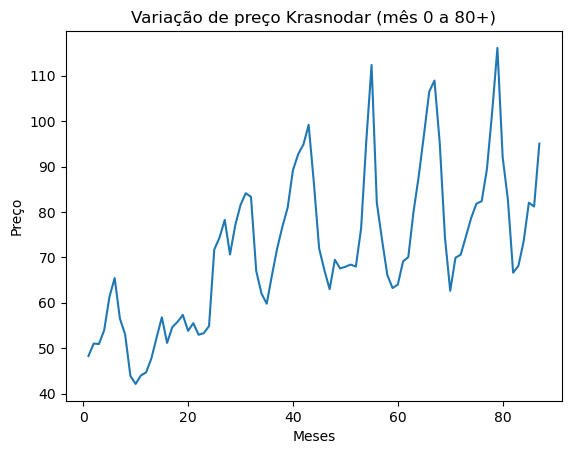

In [57]:
plt.plot(datas2, Krasnodar);
plt.title('Variação de preço Krasnodar (mês 0 a 80+)');
plt.xlabel('Meses');
plt.ylabel('Preço');

# Comparação Entre Arrays

In [46]:
Moscow.shape

(87,)

### Repartindo preços de uma cidade no periodo de um ano

Abaixo, o array que contém os dados de Moscow é repartido em 4 partes iguais, uma para cada ano.

In [47]:
Moscow_ano1 = Moscow[0:12]
Moscow_ano2 = Moscow[12:24]
Moscow_ano3 = Moscow[24:36]
Moscow_ano4 = Moscow[36:48]

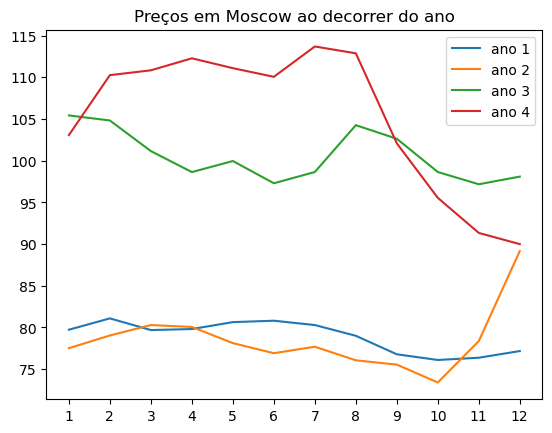

In [60]:
plt.plot(np.arange(1, 13,1), Moscow_ano1)
plt.plot(np.arange(1, 13,1), Moscow_ano2)
plt.plot(np.arange(1, 13,1), Moscow_ano3)
plt.plot(np.arange(1, 13,1), Moscow_ano4)
plt.xticks(np.arange(1, 13, 1))
plt.legend(['ano 1', 'ano 2', 'ano 3', 'ano 4'])
plt.title('Preços em Moscow ao decorrer do ano');

# Checando se Arrays são iguais

### `array_equal()`

O método `np.array_equal(array1, array2)` retorna True se os dois têm os mesmos elementos e formatos e False, caso contrário.

In [49]:
np.array_equal(Moscow_ano3, Moscow_ano4)

False

### `allclose()`

Retorna True se os arrays são iguais, elemento a elemento, com certa margem de tolerância e False, caso contrário.<br>
Recebe 3 parâmetros no exemplo abaixo, os dois primeiros sendo os arrays e o terceiro sendo a margem de tolerância que definimos.

In [50]:
np.allclose(Moscow_ano3, Moscow_ano4, 10)

True

# Lidando com Valores Faltantes


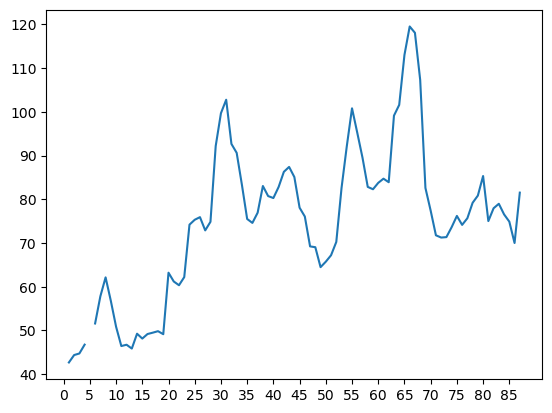

In [67]:
plt.plot(datas2, Kaliningrad, );
plt.xticks(np.arange(0, 88, 5));


#### Checando quantidade de valores faltantes no vetor

In [ ]:
np.isnan(Kaliningrad).sum()

1

## Lidando com valores NaN

A melhor abordagem para lidar com os valores que faltam é preenchê-los com a média do valor imediatamente anterior e posterior.<br>
No caso atual, o valor que falta está na posição 4 então ele deve ser preenchido com a média entre o valor na posição 3 e 5.

In [68]:
Kaliningrad[4] = np.mean([Kaliningrad[3], Kaliningrad[5]])

#### Média dos arrays inteiros

In [ ]:
np.mean(Moscow)

98.79781609195402

In [ ]:
np.mean(Kaliningrad)

74.5506896551724

# Diferença entre arrays

Dado o gráfico abaixo, caso se queira traçar uma reta para acompanhar o crescimento dos preços ao longo do tempo, pode-se usar a fórmula: `y=ax+b`.<br>

  - y = preço das maçãs
  - x = datas (elementos no eixo x)
  - a = coeficiente angular
  - b = coeficiente linear (onde a reta corta y)

### Array usado na regressão linear
O array escolhido é o dos preços em Moscow

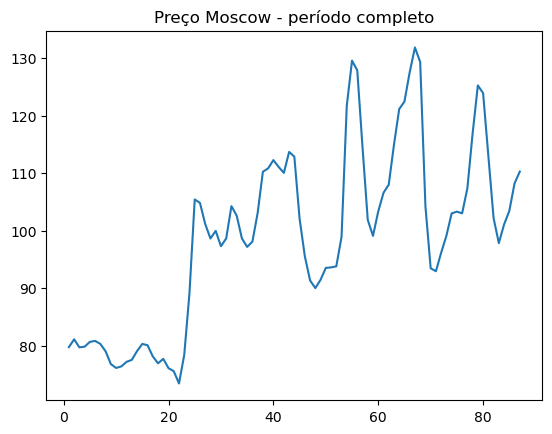

In [76]:
plt.plot(datas2, Moscow);
plt.title('Preço Moscow - período completo');

## Ajustando reta aos dados

Abaixo há a definição da fórmula da reta:

In [73]:
x = datas2

In [74]:
y = 2*x + 80

Plot do gráfico dos preços em Moscow e da reta.

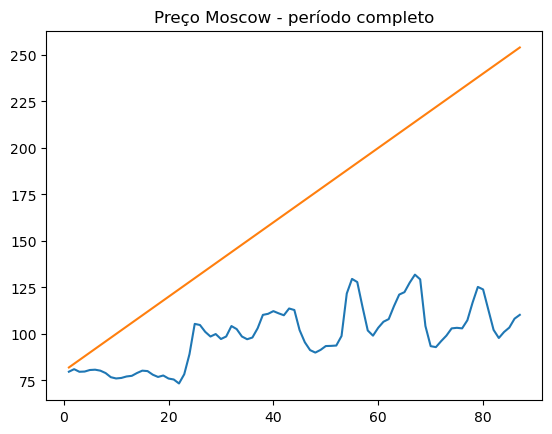

In [77]:
plt.plot(datas2, Moscow)
plt.plot(x, y);
plt.title('Preço Moscow - período completo');

## Diferença entre os arrays (distância euclidiana)

O funcionamento da fórmula abaixo:
- Moscow - y: diferença ponto a ponto entre a reta e o array de Moscow
- np.power: valores ao quadrado para cancelar qualquer número negativo.
- np.sum: para resumir toda a diferença em apenas um valor
- np.sqrt: para cancelar o efeito da np.power, retornando a distância euclidiana.

Essa fórmula calcula a distância euclidiana entre dois pontos (ou arrays) em um espaço multidimensional. Usada para quantificar a diferença entre dois vetores.

In [ ]:
np.sqrt(np.sum(np.power(Moscow - y, 2)))

749.2329171225728

### Nova tentativa

Ao deduzir um valor menor para a, é possível ter uma reta mais precisa com os preços

In [ ]:
y = 0.52*x+80

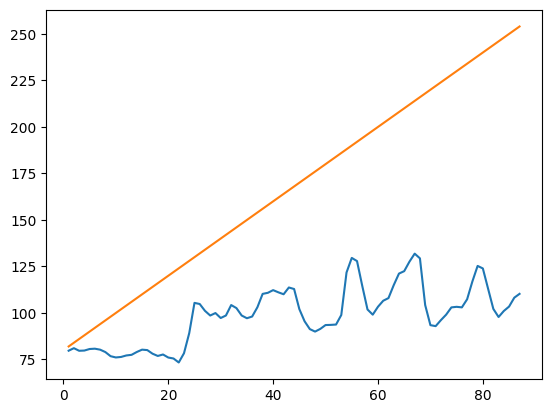

In [ ]:
plt.plot(datas, Moscow)
plt.plot(x, y);

In [ ]:
np.sqrt(np.sum(np.power(Moscow - y, 2)))

110.48504740461489

### Fórmula Distância Euclidiana:

Toda a fórmula pode ser resumida ao usar esse método passando a subtração entre os arrays.

In [ ]:
np.linalg.norm(Moscow-y)

110.48504740461489

# Copiando arrays

Caso se copie um array para outro usando atribuição:<br>
array_1_copy = array_1 <br>
Toda mudança em array_1_copy também ocorrerá em array_1 e vice versa pois ambos estão vinculados. <br>
Para criar um array cópia desvinculado do original, use o método específico para tal: `np.copy(array)`

In [ ]:
array_1 = np.arange(1, 10)
array_1

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

modo errado:

In [ ]:
array_1_copy = array_1

modo correto:

In [ ]:
array_1_copy = np.copy(array_1)

# Estimando coeficientes

Usando fórmulas matemáticas específicas é possível chegar ao valor dos coeficientes angular e linear.

## Estimando coeficiente angular (variável a)

A fórmula abaixo é usado apara fazer tal estimativa, onde:<br>
- n: número de elementos nos arrays
- Xi e Yi: arrays


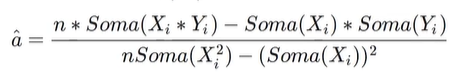

### Implementação da conta

Atribuíndo às variáveis X, Y e n.

In [ ]:
Y = Moscow
X = datas2
n = np.size(Moscow)

In [ ]:
a = (n * np.sum(X * Y) - np.sum(X) * np.sum(Y))/(n * np.sum(X**2) - np.sum(X)**2)

## Calculando coeficiente linear (variável b)


Tendo o valor de a (coef. angular) é possível chegar ao valor de b (coef. linear).

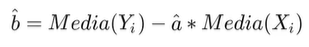

In [ ]:
b = np.mean(Y) - a * np.mean(X)
b

79.64892274792834

## Calculando Y com os valores estimados

In [ ]:
y = a*X+b

Tirando a diferença entre o array de Moscow e y calculado.

In [ ]:
np.linalg.norm(Moscow - y)

101.7969539992751

## Motivo da Regressão Linear

A regressão linear é uma técnica estatística que permite encontrar a relaão entre duas variáveis (no caso, dois arrays). Ela usa uma variável dependente (ou resposta) e uma independente (ou explicativa) para estabelecer a relação. <br>
Com o uso dá regressão linear torna-se possível estimar valores futuros ou descobrir valores intermediários.<br>
No caso do exemplo a variável dependente são os preços das maças em Moscow e a independente é o Y.

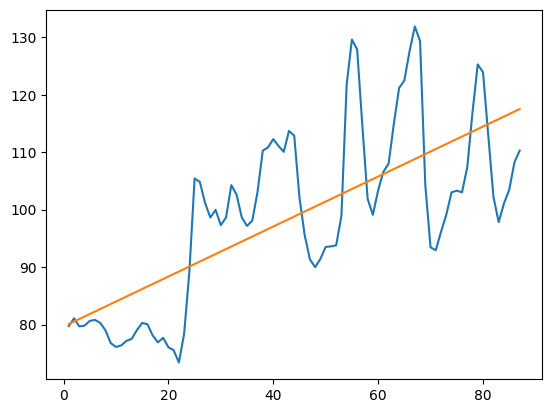

In [ ]:
plt.plot(datas2, Moscow)
plt.plot(x, y);

### Estimativa de valores

Dado um valor Z qualquer, pode-se plotar ele usando x = z e y = zxa+b de modo a apontar no gráfico a posição que esse x corresponde na variável dependente.<br>
No exemplo abaixo, 41.5 é usado para calcular quanto era o valor das maças em Moscou no mês 41 e meio.<br>
Passando o atributo `**r` gera-se um ponto vermelho no gráfico.

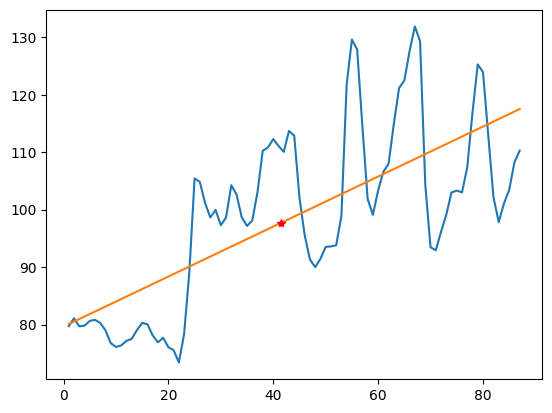

In [ ]:
plt.plot(datas2, Moscow)
plt.plot(x, y)
plt.plot(41.5, 41.5*a+b, '*r');

### Estimando valores futuros

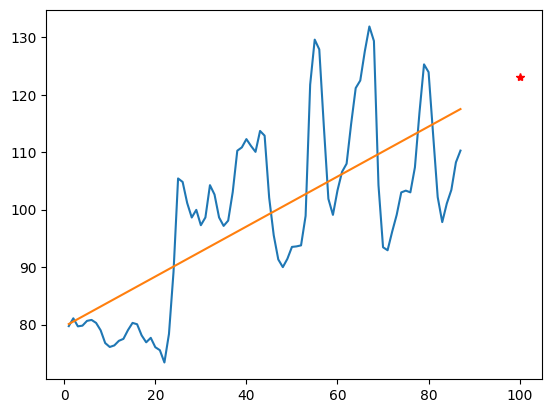

In [ ]:
plt.plot(datas2, Moscow)
plt.plot(x, y);
plt.plot(100, 100*a+b, '*r');

# Valores em um intervalo

Testando valores para os coeficientes angular e linear.<br>
A ideia é gerar números aleatórios para a, calcular a norma para cada valor de a e selecionar a menor para definir Y. Isso é feito com o uso de números pseudo-randômicos.

## Números aleatórios com Numpy

Para gerar número aleatórios use `np.random.randint()` esse método precisa de 3 atributos:
- o menor valor
- o maior valor
- o tamanho do array gerado

In [ ]:
np.random.randint(low=40, high=100, size=5)

array([51, 88, 79, 84, 54])

### Gerando array de coeficientes angulares
Abaixo é gerado um array de 100 números para o coeficiente angular no range 0.1 até 0.9.

In [ ]:
coef_angulares = np.random.uniform(low=0.1, high=0.9, size=100)

### Calculando as normas

Num array "norma" é guardado o resultado da diferença entre Moscow e cada coeficiente angular substituído na equação.

In [ ]:
norma = np.array([])
for coef in range(100):
  norma = np.append(norma, np.linalg.norm(Moscow-(coef_angulares[coef]*X+b)))

### Menor norma

Usando a função `np.min()` é possível selecionar a menor norma dentre as 100 presentes no array "norma" e por definição, essa é a que tem a menor diferença entre Moscow e o array Y.

In [ ]:
min_norma = np.min(norma)
min_norma

101.79695547795522

### where

Abaixo é usando `np.where()` para calcular o índice do array norma onde está o valor de menor norma.

In [ ]:
coef_angulares[np.where(norma == min_norma)]
coef_angulares

array([0.22596831, 0.80053377, 0.51063716, 0.67859341, 0.36045294,
       0.45356615, 0.59421041, 0.19873098, 0.60523567, 0.42388917,
       0.34639514, 0.29370475, 0.46970465, 0.72859689, 0.15861404,
       0.89744967, 0.1249247 , 0.32120561, 0.66921294, 0.56212803,
       0.73093669, 0.26002782, 0.12709905, 0.64638958, 0.22049327,
       0.13151582, 0.75394275, 0.72815477, 0.89683873, 0.35461101,
       0.38488099, 0.14818086, 0.48527531, 0.49376835, 0.75812159,
       0.10341516, 0.88062761, 0.81815461, 0.19409944, 0.76348125,
       0.14330014, 0.19080928, 0.61773092, 0.49143092, 0.44424185,
       0.10280052, 0.32725514, 0.8451953 , 0.38076905, 0.48144487,
       0.34223989, 0.84742574, 0.79812841, 0.32419249, 0.58413271,
       0.59857764, 0.24970847, 0.82078254, 0.63904069, 0.33466037,
       0.47894164, 0.79718696, 0.85708727, 0.53204185, 0.47552054,
       0.5589721 , 0.4351654 , 0.2872791 , 0.19040711, 0.63554764,
       0.88951745, 0.71451173, 0.83261232, 0.35131822, 0.49373

## Reprodutibilidade de números aleatórios



Valores aleatórios no Numpy na verdade são números pseudo-aleatórios porque eles são produtos de um cálculo que é feito sobre uma "seed". Toda vez que random é chamado uma nova seed e cálculo é feito mas, caso se mantenha a seed, todas as vezes teremos os mesmos números.

In [ ]:
np.random.seed(16)
np.random.uniform(low=0.1, high=0.9, size=100)

array([0.27863286, 0.51853067, 0.54056117, 0.13648156, 0.38858307,
       0.27846475, 0.65098093, 0.23098514, 0.15625989, 0.85280869,
       0.5509451 , 0.16239387, 0.67811241, 0.22676174, 0.30022505,
       0.3347898 , 0.65728857, 0.47141127, 0.27204971, 0.45746101,
       0.196703  , 0.83414961, 0.55315706, 0.47761545, 0.35165314,
       0.13457258, 0.70195593, 0.53461524, 0.71375234, 0.73235901,
       0.1577771 , 0.62777267, 0.14263947, 0.64801956, 0.45468077,
       0.47439692, 0.62884747, 0.65197331, 0.31066359, 0.10918315,
       0.71703556, 0.75291386, 0.21171328, 0.5624054 , 0.37253942,
       0.28577239, 0.258915  , 0.31719262, 0.88148221, 0.27234318,
       0.38512593, 0.11471996, 0.59343222, 0.28432431, 0.69388139,
       0.56740017, 0.43608284, 0.66740227, 0.87763642, 0.74803129,
       0.44452414, 0.86618288, 0.13820648, 0.68622544, 0.64053316,
       0.52160413, 0.55358996, 0.6783562 , 0.64608268, 0.73625014,
       0.19027642, 0.25933011, 0.67705538, 0.41509386, 0.37134

Usa-ase o método `.seed()` para definir o valor que será usado no cálculo, como feito abaixo.

In [ ]:
np.random.seed(84)
coef_angulares = np.random.uniform(low=0.1, high=0.9, size=100)

norma = np.array([])
for coef in range(100):
  norma = np.append(norma, np.linalg.norm(Moscow-(coef_angulares[coef]*X+b)))

In [ ]:
norma

array([173.90151233, 103.45241986, 121.75367289, 128.97173036,
       238.69504078, 149.16590195, 137.73123242, 118.54419212,
       101.79720981, 149.04689147, 112.80225228, 105.8049351 ,
       230.82444742, 111.69709582, 134.56525603, 110.93209631,
       204.12484401, 196.82117307, 221.88687726, 156.13691054,
       125.51272174, 136.46474504, 165.39506278, 240.68784732,
       104.52254473, 188.75637903, 131.2292927 , 128.94885341,
       234.70773582, 147.01799832, 113.7418054 , 116.94496221,
       109.58257043, 107.09546548, 145.00728041, 182.83818792,
       140.95017242, 106.12371866, 107.0915778 , 132.45242448,
       144.8736358 , 143.54772697, 240.23793834, 113.74604121,
       116.01191029, 152.02977343, 174.72333708, 141.8068161 ,
       101.93467119, 103.01538109, 169.59787792, 128.13083711,
       105.06648948, 101.83421597, 102.53716362, 113.63850533,
       219.96993004, 117.37921502, 182.70217805, 146.69612581,
       178.64742004, 132.25425967, 109.74998636, 186.49

In [ ]:
coef_angulares

array([0.13683279, 0.39619385, 0.29385461, 0.602784  , 0.89208805,
       0.20447044, 0.23887133, 0.30665125, 0.43471917, 0.20481511,
       0.3323601 , 0.49624488, 0.87360345, 0.33791189, 0.62144155,
       0.52849032, 0.8096211 , 0.7916786 , 0.85242626, 0.18466651,
       0.59057786, 0.24287265, 0.15934165, 0.89674619, 0.38501918,
       0.77157959, 0.61045713, 0.2676991 , 0.88274155, 0.21072909,
       0.54257849, 0.3133875 , 0.34935345, 0.36479868, 0.21666475,
       0.75660734, 0.22889395, 0.4986747 , 0.36482516, 0.25587381,
       0.21706205, 0.64938079, 0.89569528, 0.32780566, 0.55295355,
       0.19624604, 0.13469036, 0.22628157, 0.44641143, 0.40177235,
       0.1481411 , 0.59986997, 0.49023732, 0.4293729 , 0.46122788,
       0.54208756, 0.84785549, 0.31153122, 0.11414346, 0.65873013,
       0.74587422, 0.61387426, 0.52200325, 0.76589084, 0.38088747,
       0.25165091, 0.11382762, 0.88457997, 0.74881915, 0.86863621,
       0.11018484, 0.32649201, 0.28185578, 0.10218576, 0.37916

## Salvando resultados

Pode-se salvar e exportar os dados gerados no Numpy, como é feito abaixo:
1. Empilha-se os valores de norma e coeficientes angulares com `.column_stack([])`;
2. Salva-se num arquivo txt com `.savetxt('<nome.txt>, variavel, delimiter = ',' ')`.

In [ ]:
dados = np.column_stack([norma, coef_angulares])

In [ ]:
dados.shape

array([[1.73901512e+02, 1.36832795e-01],
       [1.03452420e+02, 3.96193853e-01],
       [1.21753673e+02, 2.93854614e-01],
       [1.28971730e+02, 6.02784004e-01],
       [2.38695041e+02, 8.92088048e-01],
       [1.49165902e+02, 2.04470439e-01],
       [1.37731232e+02, 2.38871331e-01],
       [1.18544192e+02, 3.06651246e-01],
       [1.01797210e+02, 4.34719173e-01],
       [1.49046891e+02, 2.04815115e-01],
       [1.12802252e+02, 3.32360100e-01],
       [1.05804935e+02, 4.96244876e-01],
       [2.30824447e+02, 8.73603452e-01],
       [1.11697096e+02, 3.37911891e-01],
       [1.34565256e+02, 6.21441549e-01],
       [1.10932096e+02, 5.28490318e-01],
       [2.04124844e+02, 8.09621105e-01],
       [1.96821173e+02, 7.91678598e-01],
       [2.21886877e+02, 8.52426259e-01],
       [1.56136911e+02, 1.84666511e-01],
       [1.25512722e+02, 5.90577856e-01],
       [1.36464745e+02, 2.42872649e-01],
       [1.65395063e+02, 1.59341647e-01],
       [2.40687847e+02, 8.96746192e-01],
       [1.045225

In [ ]:
np.savetxt('dados.csv', dados, delimiter = ',')

# Outros

## Desafio

### Importação por link

In [ ]:
url_2 = 'http://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'

In [ ]:
dados_desafio = np.loadtxt(url_2, delimiter=',', usecols=np.arange(1,6,1), skiprows=1)
dados_desafioT = dados_desafio.T
dados_desafioT

NameError: name 'url_2' is not defined

### Importação por arquivo

In [ ]:
dados_desafio = np.loadtxt('./docs/citrus.csv', delimiter=',', usecols=np.arange(1, 6, 1), skiprows=1)
dados_desafioT = dados_desafio.T
dados_desafioT

array([[  2.96,   3.91,   4.42, ...,  15.59,  15.92,  16.45],
       [ 86.76,  88.05,  95.17, ..., 256.5 , 260.14, 261.51],
       [172.  , 166.  , 156.  , ..., 168.  , 142.  , 152.  ],
       [ 85.  ,  78.  ,  81.  , ...,  82.  ,  72.  ,  74.  ],
       [  2.  ,   3.  ,   2.  , ...,  20.  ,  11.  ,   2.  ]])

In [ ]:
diametros_laranja = dados_desafio[:5000, 0]
diametros_toranja = dados_desafio[5000:, 0]
peso_laranja = dados_desafio[:5000, 1]
peso_toranja = dados_desafio[5000:, 1]

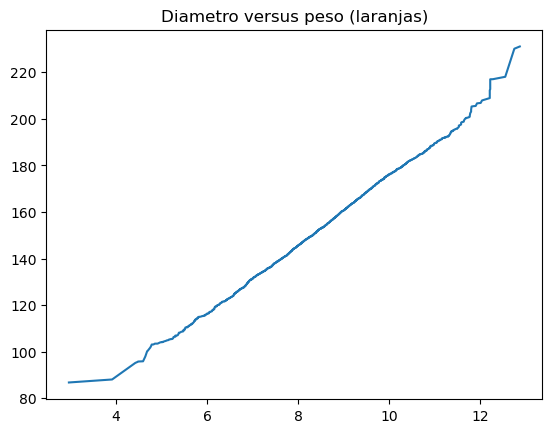

In [ ]:
plt.plot(diametros_laranja, peso_laranja);
plt.title('Diametro versus peso (laranjas)');

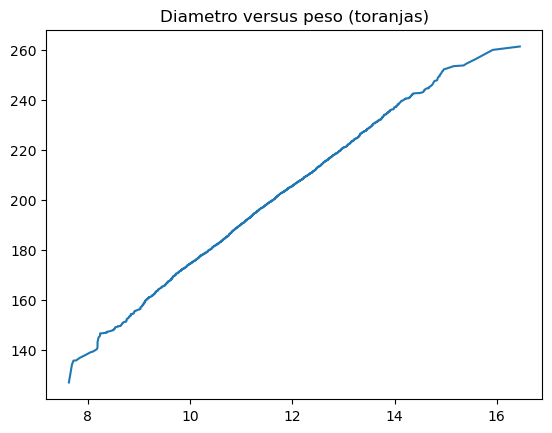

In [ ]:
plt.plot(diametros_toranja, peso_toranja);
plt.title('Diametro versus peso (toranjas)');

### Coeficientes

In [ ]:
X = diametros_toranja
Y = peso_toranja
n = np.size(diametros_toranja)

In [ ]:
a = (n * np.sum(X*Y) - np.sum(X) * np.sum(Y))/(n * np.sum(X ** 2) - np.sum(X)**2)

In [ ]:
b = np.mean(Y) - a * np.mean(X)

In [ ]:
y = a*X+b

Text(0.5, 1.0, 'Regessão linear toranjas')

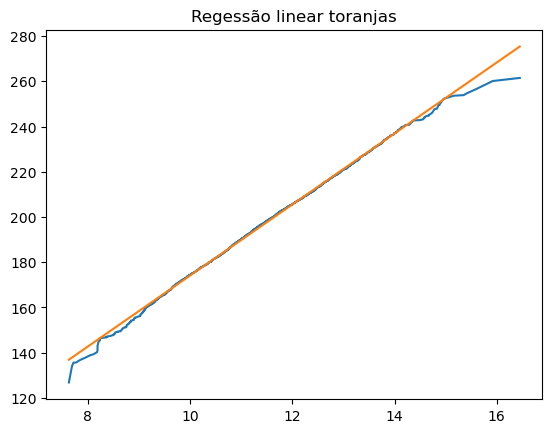

In [ ]:
plt.plot(diametros_toranja, peso_toranja)
plt.plot(X, y);
plt.title('Regessão linear toranjas')

In [ ]:
np.linalg.norm(diametros_toranja - y)

13200.667540940945

In [ ]:
X2 = diametros_laranja
Y2 = peso_laranja
n2 = np.size(X2)

In [ ]:
a2 = (n2 * np.sum(X2*Y2) - np.sum(X2) * np.sum(Y2))/(n2 * np.sum(X2 ** 2) - np.sum(X2)**2)

In [ ]:
b2 = np.mean(Y2) - a2 * np.mean(X2)

In [ ]:
y2 = a2*X2+b2

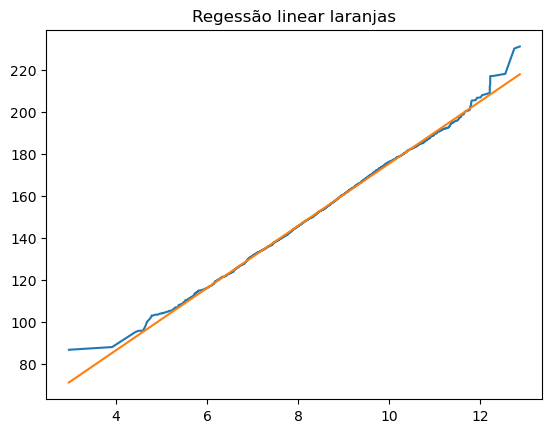

In [ ]:
plt.plot(diametros_laranja, peso_laranja)
plt.plot(X2, y2);
plt.title('Regessão linear laranjas');

### Advinhando Valores

In [ ]:
coef_angulares2 = np.random.uniform(0.0, 30.0, 100)

In [ ]:
norma2 = np.array([])
for i in range(100):
  norma2 = np.append(norma2, np.linalg.norm(Y2 - (coef_angulares[i]*X2 + 17)))

In [ ]:
norma2

array([9610.26134999, 9453.14585186, 9515.14077274, 9327.9981522 ,
       9152.74467437, 9569.28784339, 9548.44849468, 9507.38884344,
       9429.80805339, 9569.07904624, 9491.81496582, 9392.53714404,
       9163.942185  , 9488.45180981, 9316.69584103, 9373.00357774,
       9202.70112329, 9213.57025902, 9176.77080681, 9581.28465702,
       9335.39235695, 9546.02457932, 9596.62594291, 9149.92288664,
       9459.91522535, 9225.745753  , 9323.34994735, 9530.98523579,
       9158.40654954, 9565.49648121, 9364.46928222, 9503.308162  ,
       9481.5207602 , 9472.16437202, 9561.9007814 , 9234.8155851 ,
       9554.49258232, 9391.06521349, 9472.14832603, 9538.14874571,
       9561.66010359, 9299.77089412, 9150.55950182, 9494.57394699,
       9358.18430544, 9574.2700166 , 9611.55919561, 9556.07511203,
       9422.72513936, 9449.76652223, 9603.41100949, 9329.76340424,
       9396.1763872 , 9433.04670977, 9413.74966082, 9364.7666768 ,
       9179.53966461, 9504.4326613 , 9624.00609392, 9294.10728

## Teste

Plot dos dados da cidade "Krasnodar".<br>
Como os preços flutuaram num período anual.

### Preparando cortes da cidade "Krasnodar"

In [ ]:
Krasnodar_ano1 = Krasnodar[0:12]
Krasnodar_ano2 = Krasnodar[12:24]
Krasnodar_ano3 = Krasnodar[24:36]
Krasnodar_ano4 = Krasnodar[36:48]

NameError: name 'Krasnodar' is not defined

### Plotando os dados de Krasnodar

In [ ]:
plt.plot(np.arange(1, 13, 1), Krasnodar_ano1)
plt.plot(np.arange(1, 13, 1), Krasnodar_ano2)
plt.plot(np.arange(1, 13, 1), Krasnodar_ano3)
plt.plot(np.arange(1, 13, 1), Krasnodar_ano4)



NameError: name 'Krasnodar_ano1' is not defined

In [ ]:
plt.ylabel('preço')
plt.xlabel('meses')
plt.legend(['ano 1', 'ano 2', 'ano 3', 'ano 4'])
plt.title("Preços Krasnodar");